In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/manojrayana/Documents/ml_projects_3/notebook/Data/stud.csv')

In [5]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()  # why we keep () on isna---- ask ravi or gpt

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# checking the number of unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
# checking the statistics of the data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("categoroies in 'gender' variable:  ",end=" ")  # know specifically the difference between " " and ''
print(df['gender'].unique())
print("categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())
print("categories in 'parental_level_of_educaion' variable: ",end="")
print(df['parental_level_of_education'].unique())
print("categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())
print("categories in 'test_preparation_course' variable: ",end="")
print(df['test_preparation_course'].unique())

categoroies in 'gender' variable:   ['female' 'male']
categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_educaion' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']
categories in 'test_preparation_course' variable: ['none' 'completed']


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('we have {} numeric features: {}'.format(len(numeric_features),numeric_features))

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('we have {} categorical features:{}'.format(len(categorical_features),categorical_features))

we have 3 numeric features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [15]:
# feature engineering 
df['Total_score'] = df['math_score']+ df['reading_score']+ df['writing_score']
df['average'] = df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score']== 100]['race_ethnicity'].count()
print(f'number of students with full marks in reading: {reading_full}')

writing_full = df[df['writing_score']==100]['race_ethnicity'].count()
print(f'number of students with full writing score is {writing_full}')

math_full = df[df['math_score']==100]['race_ethnicity'].count()
print(f'number of student with math full is {math_full}')

number of students with full marks in reading: 17
number of students with full writing score is 14
number of student with math full is 7


In [18]:
# finding the students with score less than 20
reading_lessthan20 = df[df['reading_score']<= 20]['lunch'].count()
print(f'number of stuents having score less than 20: {reading_lessthan20}')

writing_lessthan20 = df[df['writing_score']<= 20]['lunch'].count()
print(f'number of student having writing score less than 20: {writing_lessthan20}')

math_lessthan20 = df[df['math_score']<= 20]['lunch'].count()
print(f'number of student with math score less than 20: {math_lessthan20}')

number of stuents having score less than 20: 1
number of student having writing score less than 20: 3
number of student with math score less than 20: 4


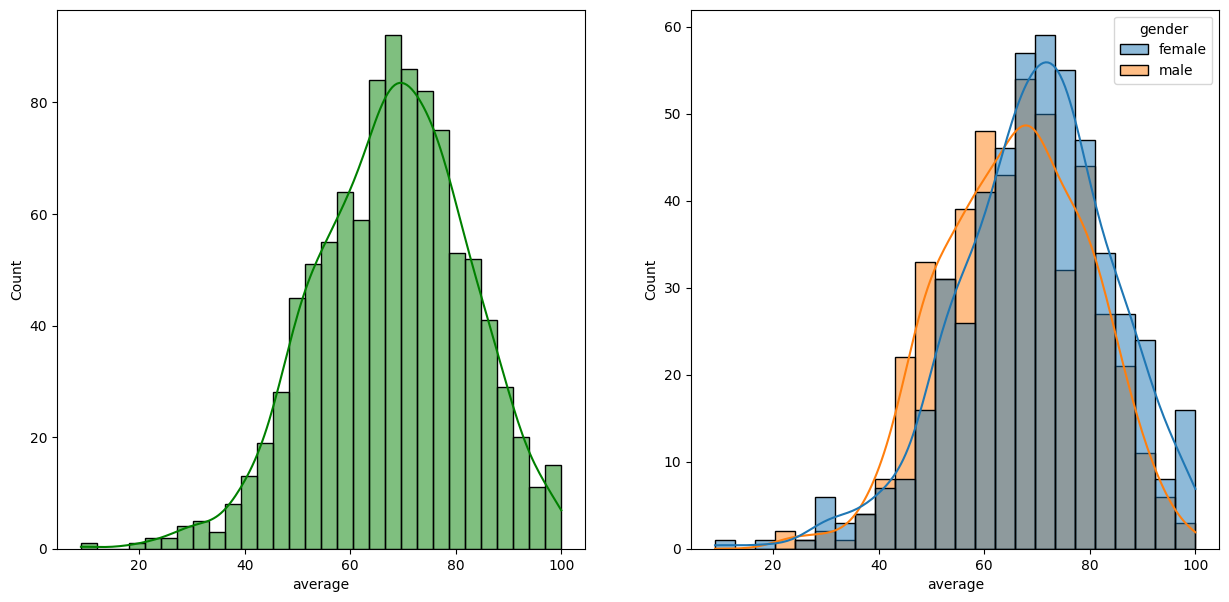

In [19]:
# Histograam and KDE
fig, axs = plt.subplots(1, 2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde ='True',color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde= 'True',hue='gender')
plt.show()

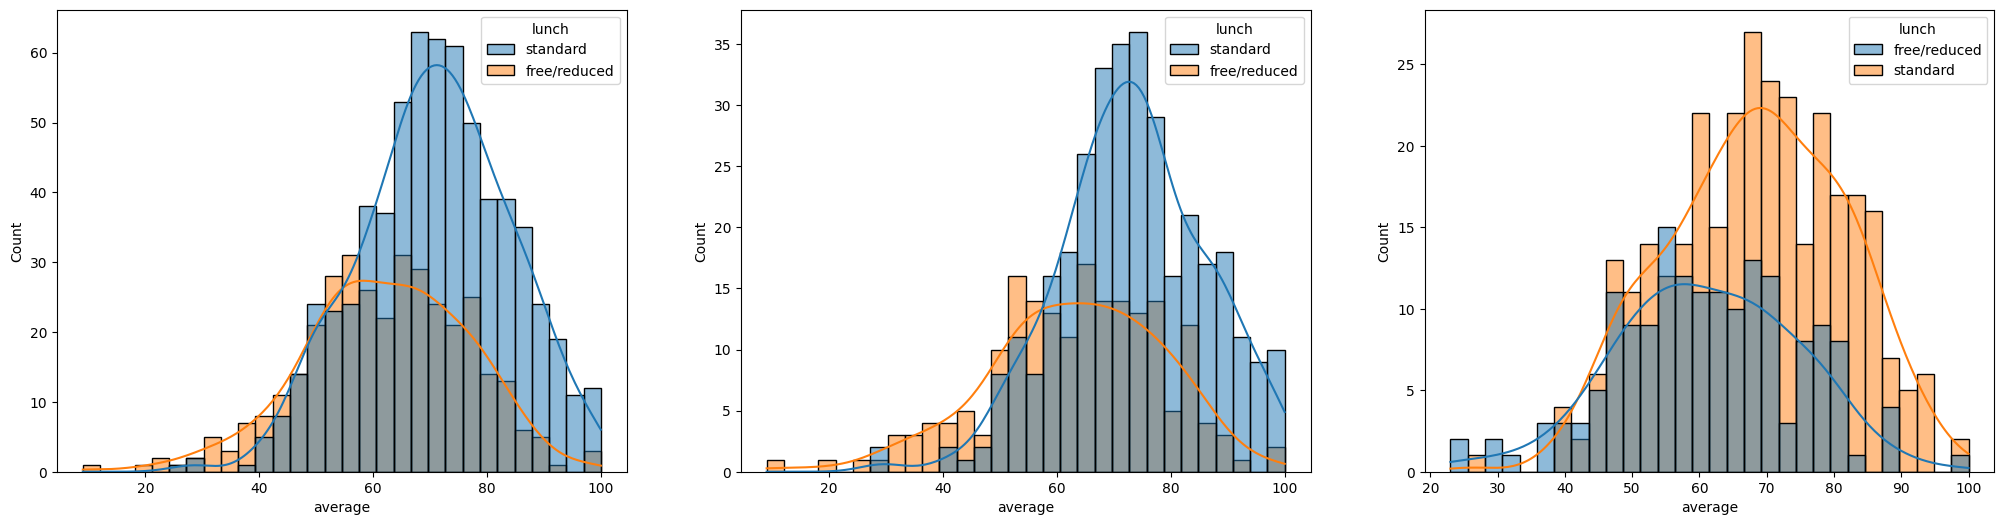

In [20]:
plt.subplots(1,3,figsize= (25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde='true', hue= 'lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde='True',hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde='True',hue='lunch')
plt.show()

<Axes: xlabel='average', ylabel='Count'>

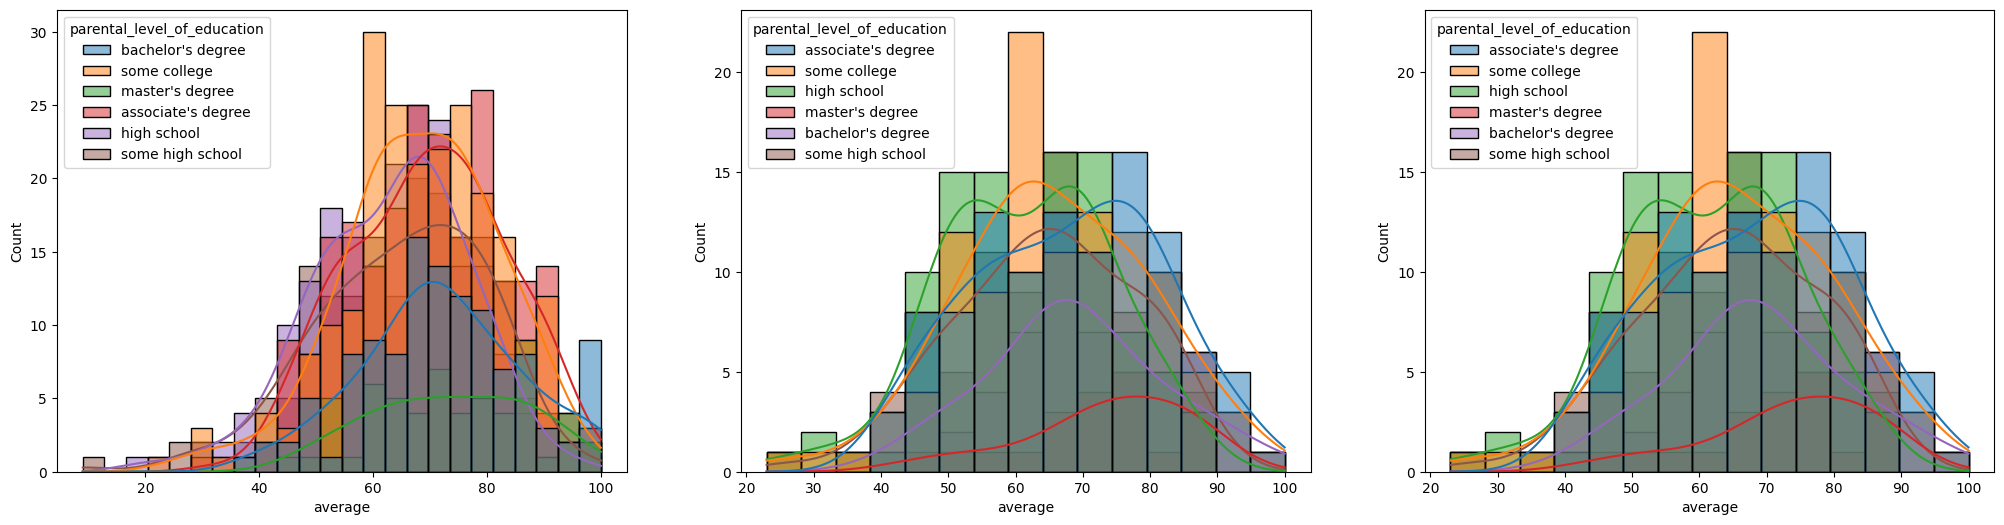

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde='True',hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde='True',hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde='True',hue='parental_level_of_education')


<Axes: xlabel='average', ylabel='Count'>

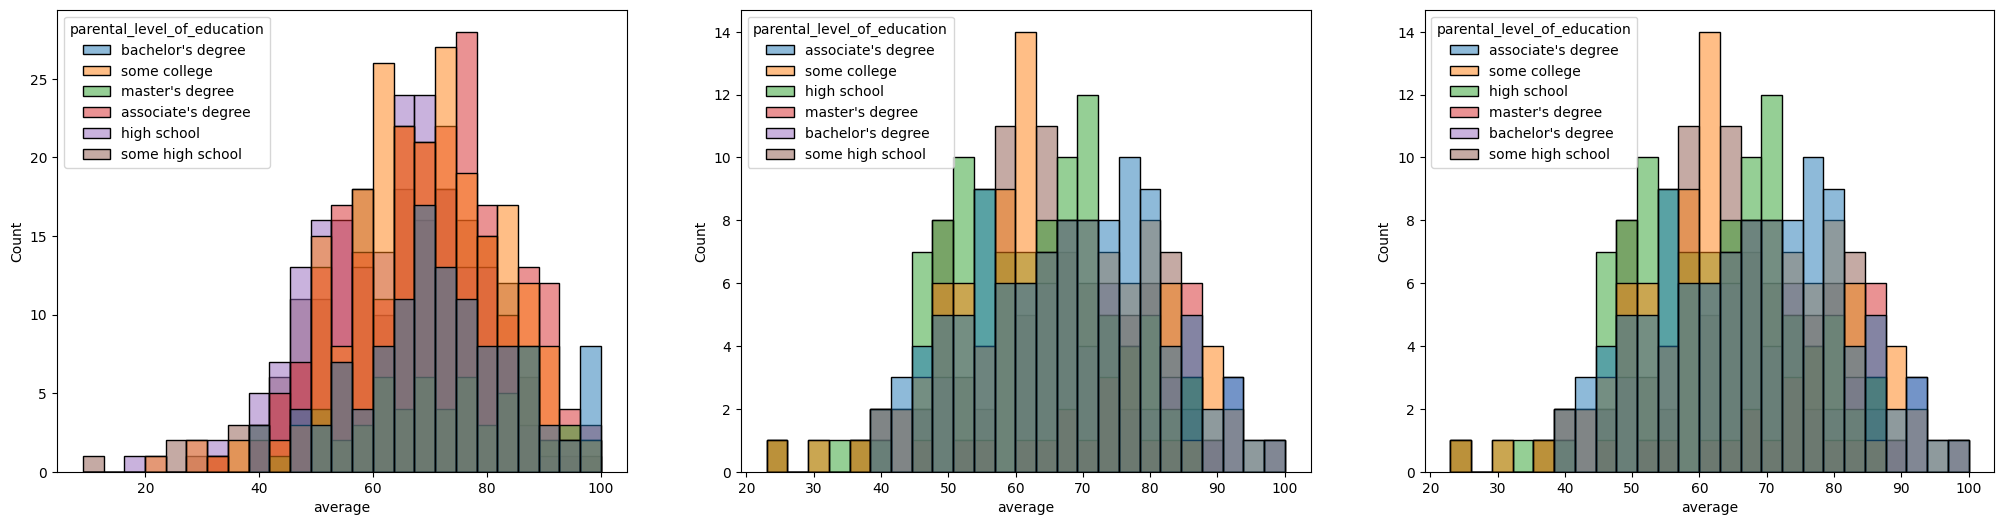

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=25,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],bins=25,x='average',hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],bins=25,x='average',hue='parental_level_of_education')

<Axes: xlabel='average', ylabel='Count'>

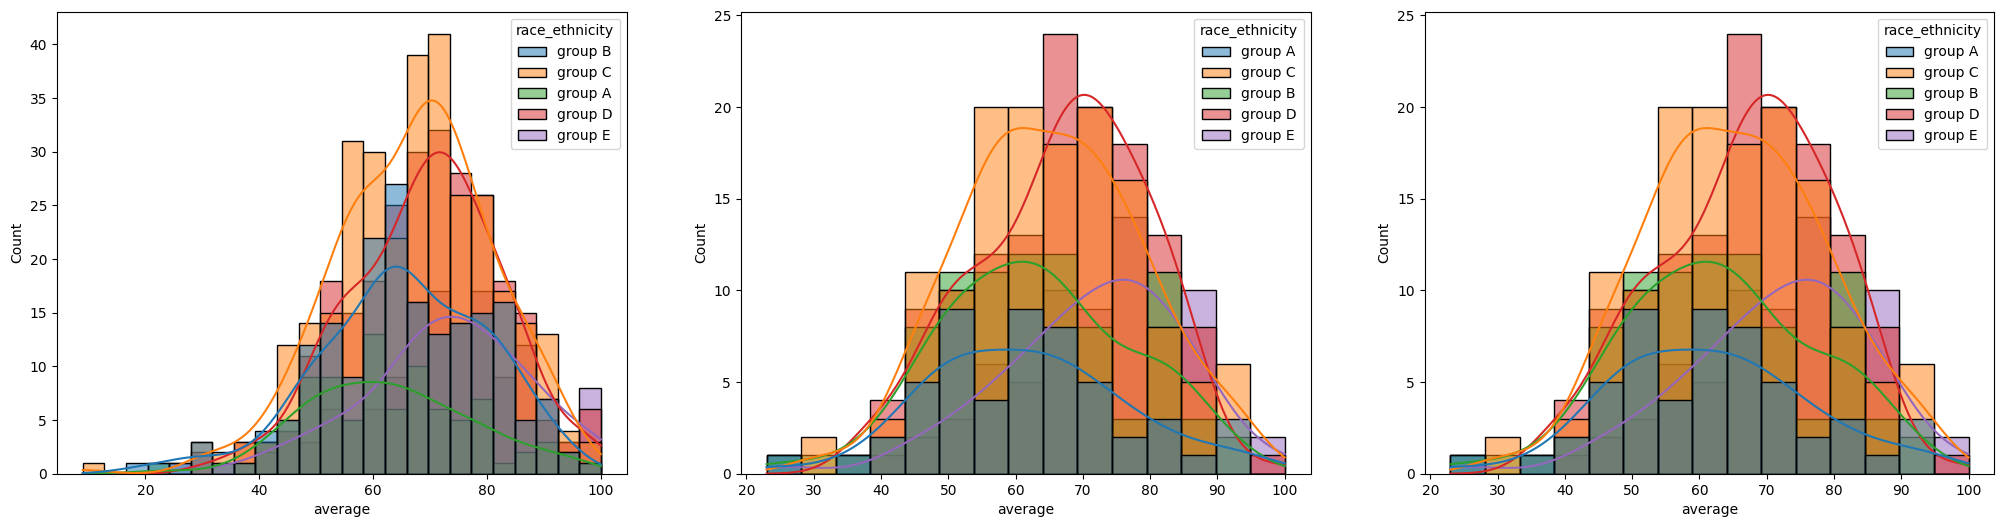

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde='True',hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde='True',hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde='True',hue='race_ethnicity')

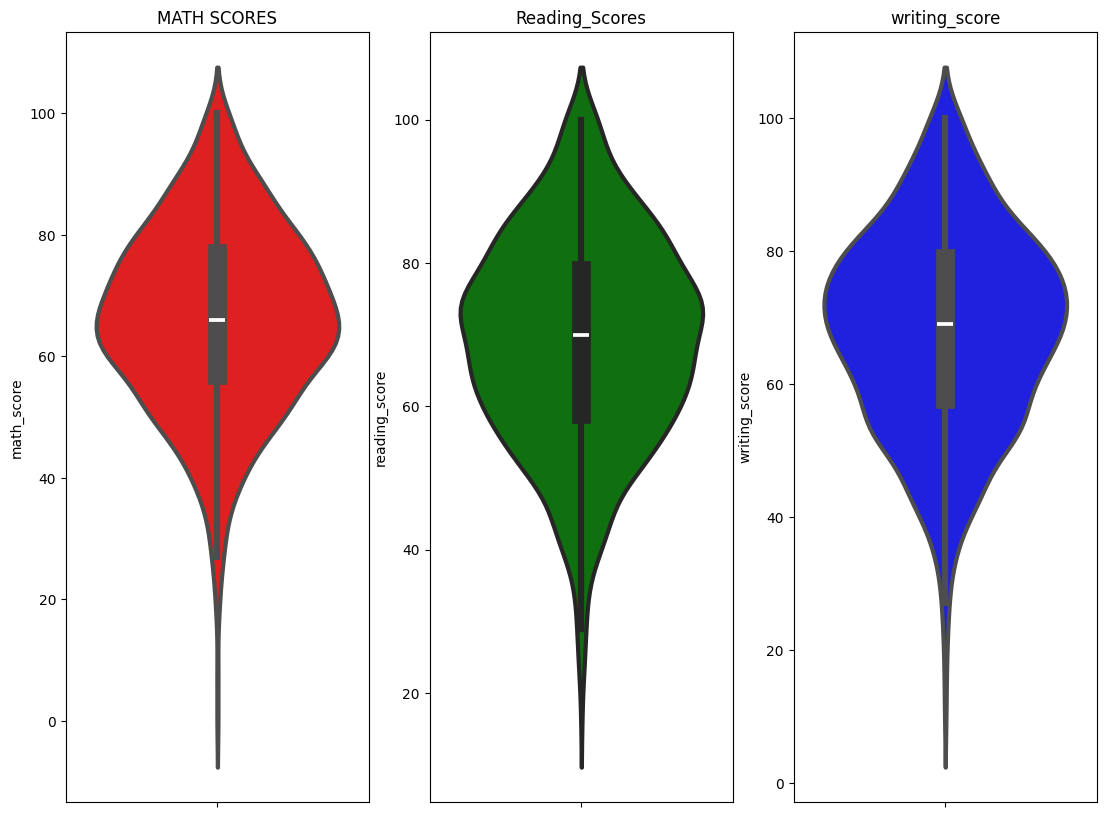

In [24]:
plt.figure(figsize=(18,10))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading_Scores')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('writing_score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

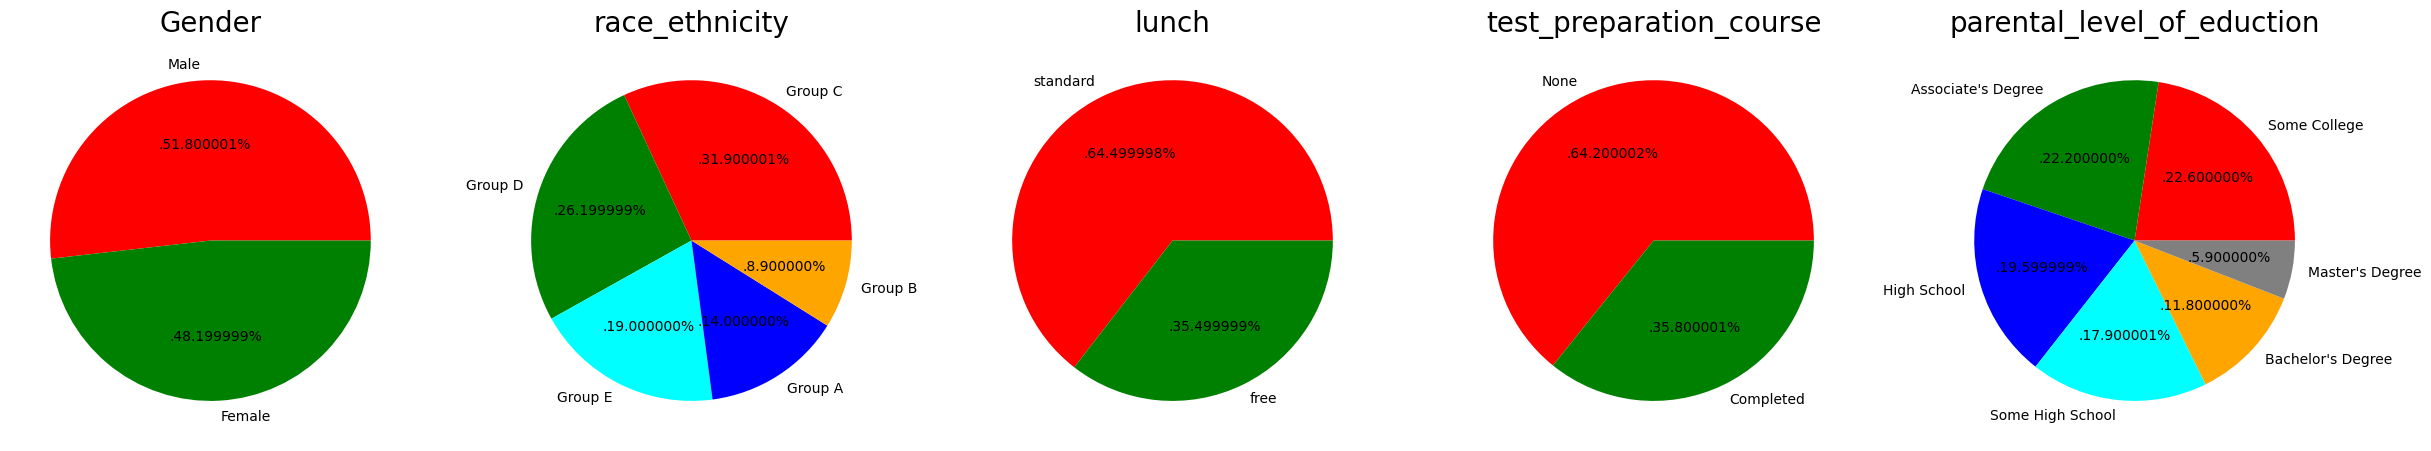

In [28]:
# multi variate analysis using pieplot
plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Male','Female'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize= 20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C','Group D','Group E','Group A','Group B'
color = ['red','green','cyan','blue','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'standard','free'
color = 'Red','Green'

plt.pie(size,colors=color,labels= labels,autopct='.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
colors = 'red','green'

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test_preparation_course',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size =df['parental_level_of_education'].value_counts()
label = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels= label,autopct='.%2f%%')
plt.title('parental_level_of_eduction',fontsize = 20)
plt.axis('off')

plt.show()

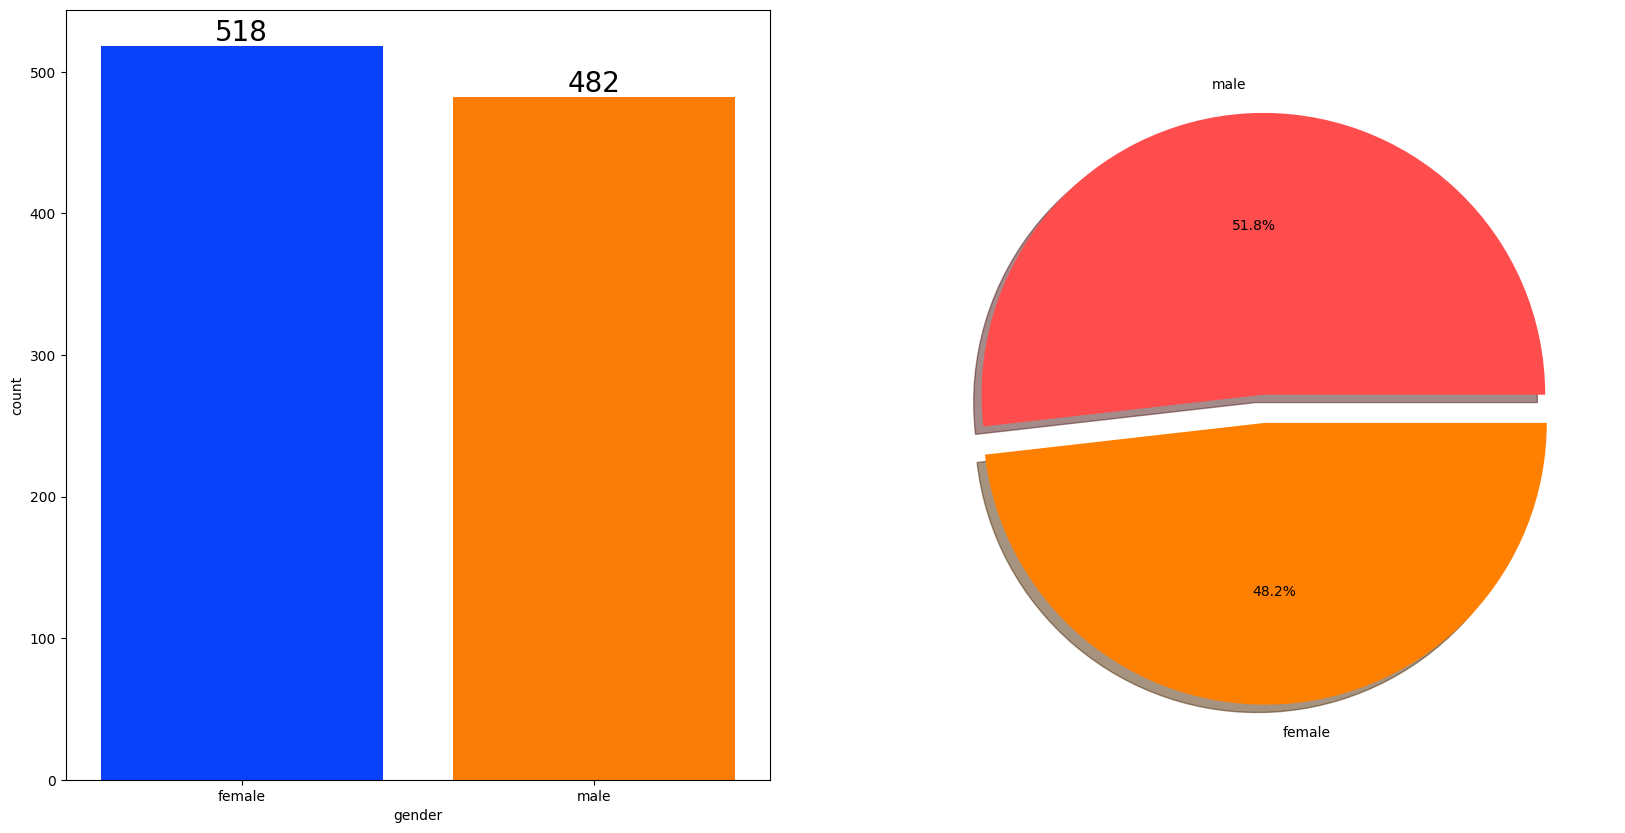

In [32]:
# feature wise visualization
# how is distribution of gender
# is gender has any impact on students performance?
# univariate analysis
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['male','female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [39]:
# Bivariate Analysis
gender_group = df.groupby('gender')[['math_score','reading_score','writing_score','Total_score']].mean()
gender_group

,math_score,reading_score,writing_score,Total_score
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


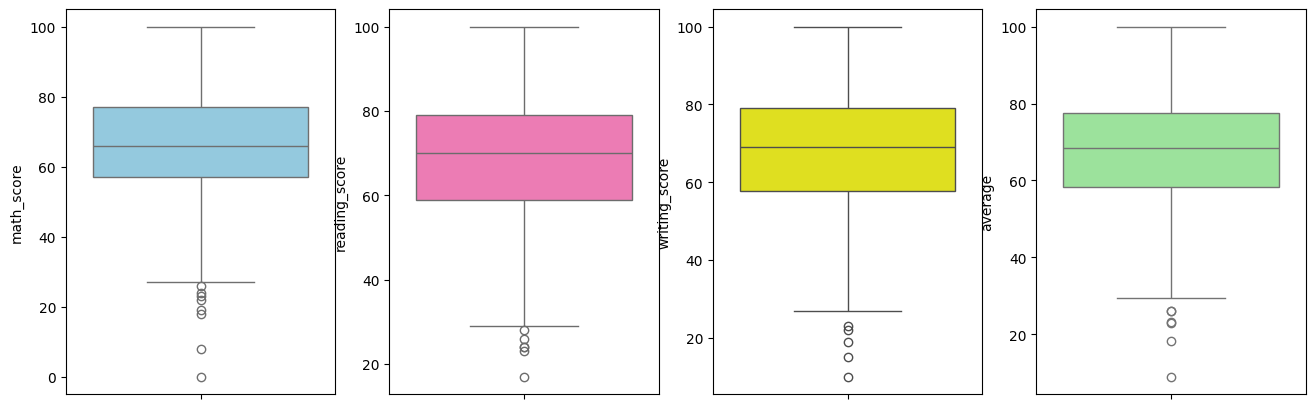

In [42]:
# checking the outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color ='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

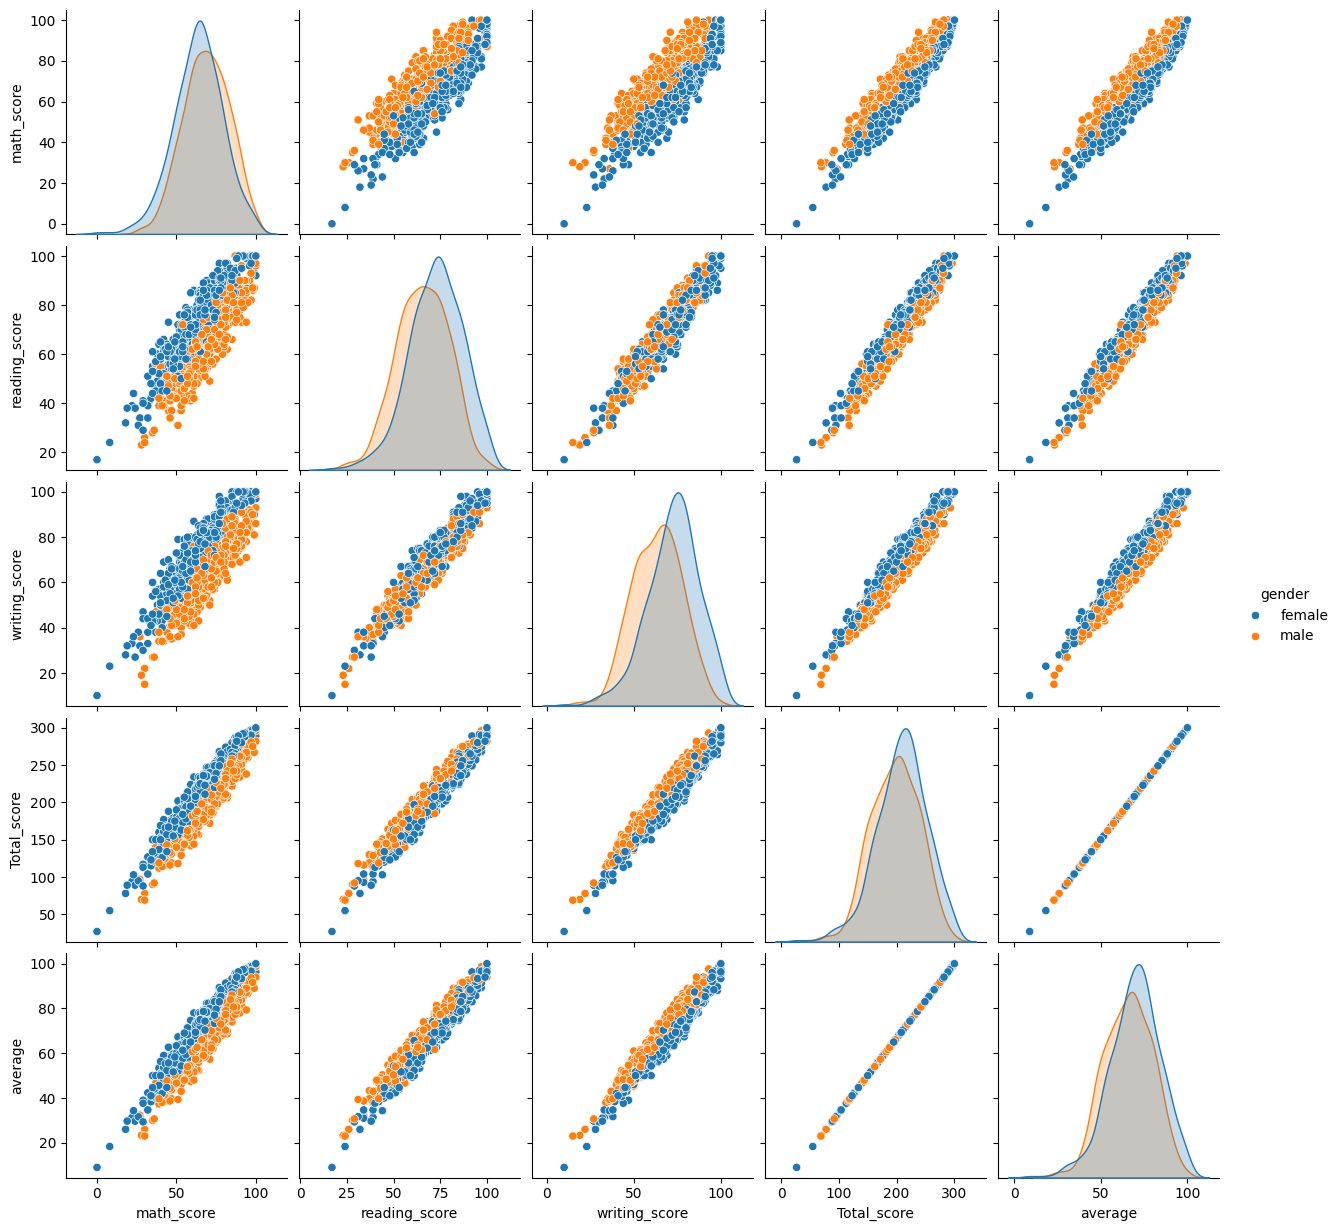

In [43]:
# multivariate analysis -used to anlalize the relations between the data
sns.pairplot(df,hue='gender')
plt.show()